In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

Import Data

In [6]:
db = pd.read_csv('/content/drive/MyDrive/Project_DIABETOR/diabetesdataset.csv')
db

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1.0
1,1,85,66,29,0,26.6,0.351,31,0.0
2,8,183,64,0,0,23.3,0.672,32,1.0
3,1,89,66,23,94,28.1,0.167,21,0.0
4,0,137,40,35,168,43.1,2.288,33,2.0
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0.0
764,2,122,70,27,0,36.8,0.340,27,0.0
765,5,121,72,23,112,26.2,0.245,30,0.0
766,1,126,60,0,0,30.1,0.349,47,1.0


Data Understanding

In [7]:
print("Data Shape = ", db.shape)

Data Shape =  (768, 9)


In [8]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    float64
dtypes: float64(3), int64(6)
memory usage: 54.1 KB


In [9]:
db[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']].describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [10]:
db.Outcome.value_counts()

,count
Outcome,
0.0,493
1.0,249
2.0,26


Cleaning Data

In [11]:
db.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [12]:
db.duplicated().sum()

0

Exploratory Data Analysis

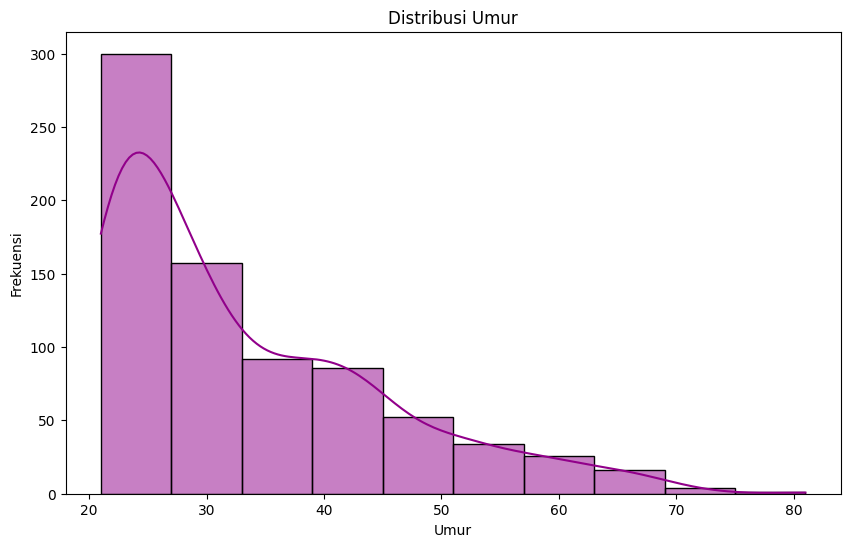

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(data=db, x='Age', bins=10, kde=True, color='#91008a')

plt.title('Distribusi Umur')
plt.xlabel('Umur')
plt.ylabel('Frekuensi')
plt.show()

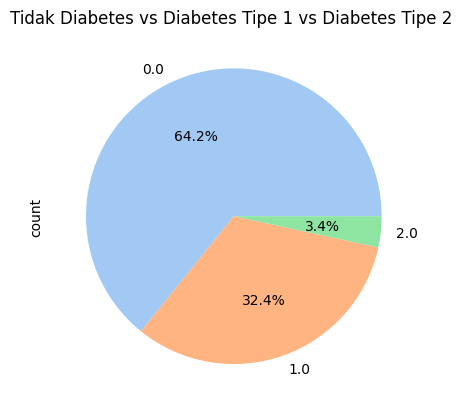

In [14]:
sns.set_palette('pastel')
db['Outcome'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Tidak Diabetes vs Diabetes Tipe 1 vs Diabetes Tipe 2 ')
plt.show()

<ipython-input-15-5cf41a05a6e0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=db, x='Outcome', palette='rocket')


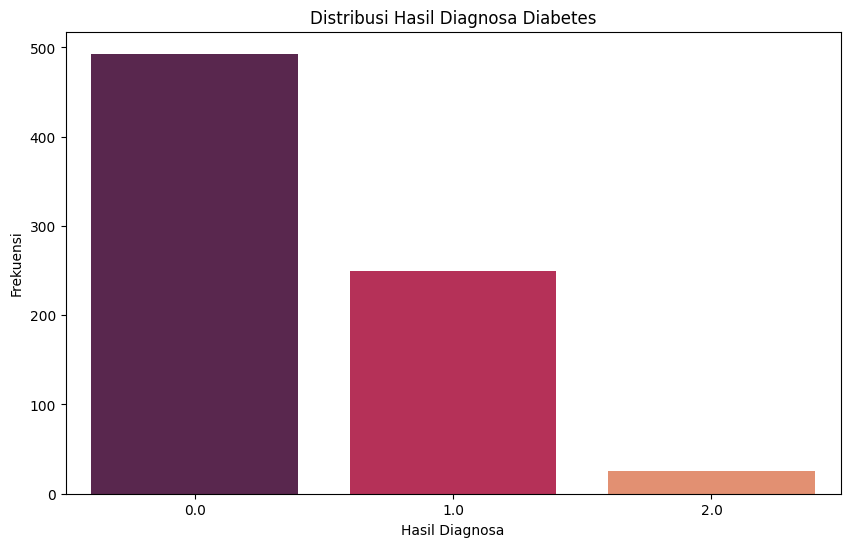

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(data=db, x='Outcome', palette='rocket')

plt.title('Distribusi Hasil Diagnosa Diabetes')
plt.xlabel('Hasil Diagnosa')
plt.ylabel('Frekuensi')
plt.show()

In [16]:
db.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.181483
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.497811
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.090928
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.105201
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.176606
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.325153
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.372945
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.221602
Outcome,0.181483,0.497811,0.090928,0.105201,0.176606,0.325153,0.372945,0.221602,1.000000


<Axes: >

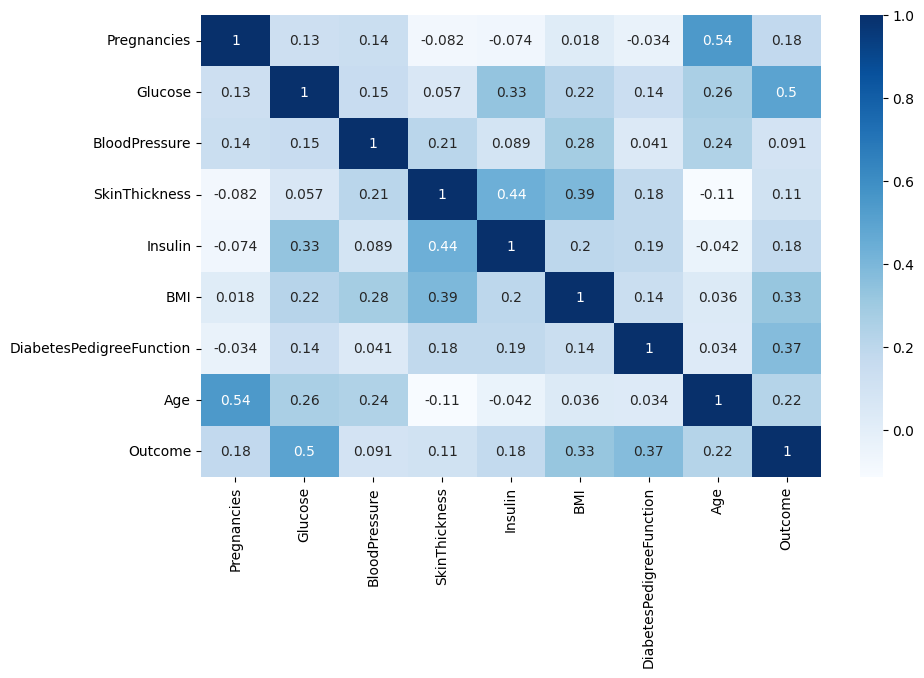

In [17]:
plt.figure(figsize=(10, 6))
sns.heatmap(db.corr(), annot=True, cmap='Blues')

Preperation Data

In [18]:
x=db.drop(columns=['Outcome'])
y=db['Outcome']

print(x.shape)
print(y.shape)

(768, 8)
(768,)


In [19]:
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(614, 8)
(154, 8)
(614,)
(154,)


Modeling n Evaluation

In [23]:
clf = SVC(kernel='linear')
clf.fit(x_train, y_train)

x_train_acc = clf.predict(x_train)
clf.acc = accuracy_score(x_train_acc, y_train)

print(classification_report(x_train_acc, y_train))
print("Akurasi SVM Training : {:.2f}%".format(clf.acc*100))

              precision    recall  f1-score   support

         0.0       0.89      0.80      0.84       429
         1.0       0.58      0.73      0.65       162
         2.0       0.95      0.91      0.93        23

    accuracy                           0.79       614
   macro avg       0.81      0.81      0.81       614
weighted avg       0.81      0.79      0.79       614

Akurasi SVM Training : 78.50%


In [24]:
y_pred = clf.predict(x_test)
clf.acc = accuracy_score(y_test, y_pred)

print(classification_report(y_test, y_pred))
print("Akurasi SVM Testing : {:.2f}%".format(clf.acc*100))

              precision    recall  f1-score   support

         0.0       0.81      0.90      0.85       107
         1.0       0.62      0.47      0.53        43
         2.0       0.67      0.50      0.57         4

    accuracy                           0.77       154
   macro avg       0.70      0.62      0.65       154
weighted avg       0.75      0.77      0.75       154

Akurasi SVM Testing : 76.62%


In [27]:
# prompt: save model in google drive

import pickle
from google.colab import drive
drive.mount('/content/drive')
filename = '/content/drive/MyDrive/Project_DIABETOR/diabetes_model.sav'
pickle.dump(clf, open(filename, 'wb'))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Tes Model

In [30]:
# prompt: input data

import numpy as np
input_data = (5,166,72,19,175,25.8,0.587,51)

# mengubah input data ke numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize input data
std_data = scaler.transform(input_data_reshaped)

prediction = clf.predict(std_data)
print(prediction)

if (prediction[0] == 1):
  print('Pasien terkena Diabetes Tipe 1')
elif (prediction[0] == 2):
  print('Pasien terkena Diabetes Tipe 2')
else:
  pass
  print('Pasien tidak terkena Diabetes')


[1.]
Pasien terkena Diabetes Tipe 1


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
